In [1]:
import Zip
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time

#The list of channels in the detector
channels_in_detector = { 'tpc': list(range(0, 247+1)), 'veto': list(range(248, 253+1)), 'sum_wv': [254], 'busy_on': [255], 'busy_off': [256], 'hev_on': [257], 'hev_off': [258], 'muon_veto_trigger': [259], } 
n_channels = 260

In [2]:
#The calibration data files
NG = Zip.ReadZipped("/data/nikhefproject/data/xenon1t/NG") # Neutron data
Rn220 = Zip.ReadZipped("/data/nikhefproject/data/xenon1t/Rn220") # Rn-220 data

In [3]:
# A waveform reader function
def Waveform(eventnr):
    event = NG.get_single_event(eventnr)
                                
    #The variables that check if a channel is the minimum channel
    adcmin = 16382
    minchannel = 0
    
    #A list that holds all the channels with significant pulses 
    channellist = []
    
    #Create the datapoint arrays
    n = 350000  
    ts = np.ones((n_channels, n), dtype=np.int16)
    ts = ts * 16382 
    t = np.linspace(0, n, n) 
    
    #Loop over all pulses in the event
    for p in event.pulses:
        ch = p.channel
        i = np.zeros(n_channels, dtype = int)
        #print(p.channel, ": ", p.left, p.right-p.left)
        for adc in p.raw_data:
            
            #Add the ADC value to the appropriate channel array
            ts[ch][p.left + i[ch]] = adc
            i[ch] = i[ch] + 1
            
            #Append all significant main channels to the list
            if adc < 15000 and ch not in channellist and ch in channels_in_detector['tpc']:
                channellist.append(ch)
                
            #Check which channel is the minimum channel
            if adc < adcmin:
                adcmin = adc
                minchannel = ch
                
    #Sort for convenience
    channellist.sort()
    return t, ts, channellist, minchannel

#Select the event number and process the waveform
eventnumber = 4
Input = Waveform(eventnumber)
print(Input[2])
print('The lowest recorded ADC reading for event %i occured in channel %i' % (eventnumber, Input[3]))

[0, 3, 4, 6, 24, 30, 32, 33, 35, 36, 37, 38, 39, 40, 41, 63, 64, 66, 67, 68, 69, 70, 74, 75, 81, 87, 89, 90, 92, 95, 96, 98, 104, 105, 106, 107, 108, 109, 121, 126, 127, 128, 129, 131, 132, 133, 136, 138, 140, 141, 142, 143, 144, 145, 146, 147, 149, 151, 153, 154, 155, 156, 157, 158, 159, 160, 161, 163, 164, 165, 166, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 179, 180, 181, 182, 184, 185, 186, 187, 188, 189, 191, 192, 193, 194, 195, 196, 197, 199, 200, 201, 202, 204, 207, 208, 209, 210, 211, 212, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 235, 236, 237, 238, 240, 241, 242, 243, 245, 246, 247]
The lowest recorded ADC reading for event 4 occured in channel 0


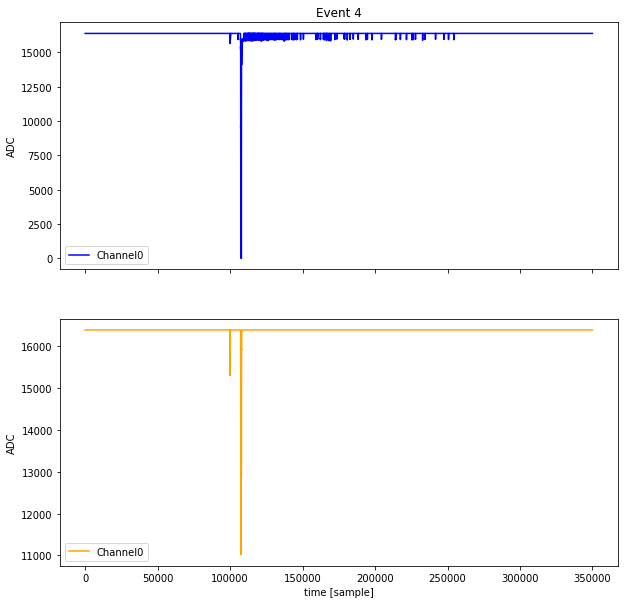

In [4]:
#Select two channels to compare
channel1 = 0
channel2 = 254

#Plot the two channels
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 10) # can't be in same cell as import matplotlib 
figs, ax = plt.subplots(2, 1, sharex='col')
ax[0].plot(Input[0], Input[1][channel1], label='Channel' + str(channel1), color = 'blue')
ax[1].plot(Input[0], Input[1][channel2], label='Channel' + str(channel1), color='orange')
ax[0].set_ylabel("ADC")
ax[1].set_ylabel("ADC")
ax[1].set_xlabel("time [sample]")
ax[0].set_title('Event ' + str(eventnumber))
ax[0].legend()
ax[1].legend()
#ax[0].set_xlim(90000,120000)
#ax[1].set_xlim(90000,120000)